<a href="https://colab.research.google.com/github/umesh024/CS-644-Deep-Learning-and-Data-Analytics-Lab-2025/blob/main/24MCS123_Experimentno_1_Single_unit_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **OVERVIEW OF MOST COMMONLY USED PYTHON PACKAGES** -






1. MATH : Provides basic mathematical functions (e.g., trigonometric, logarithmic, exponential, etc.) for numerical operations. It includes functions like sqrt(), pow(), sin(), cos(), log(), etc.
Works directly on scalars (individual numbers).

2. Scipy : Built on NumPy; used for scientific and technical computing tasks like optimization, integration, interpolation, and signal processing. Modules like scipy.optimize, scipy.signal, and scipy.stats.
Handles tasks like curve fitting, numerical integration, and Fourier transforms.

3. NumPy : Provides support for large, multi-dimensional arrays and matrices, along with high-level mathematical functions to operate on them.
Supports linear algebra, random number generation, and Fourier analysis.

4. Matplotlib : A 2D plotting library for visualizations like line plots, scatter plots, bar charts, histograms, etc. Customizable plots with titles, labels, and legends.
Integrates with other libraries like Pandas and Seaborn.

5. Pandas : Used for data manipulation and analysis, particularly for structured data in the form of tables (DataFrames).

6. Sklearn (Scikit-learn) : Provides tools for machine learning, including classification, regression, clustering, and preprocessing.

7. TensorFlow : A deep learning framework for building and training neural networks.

8. Keras : A high-level API for building neural networks, integrated into TensorFlow but can also work independently.

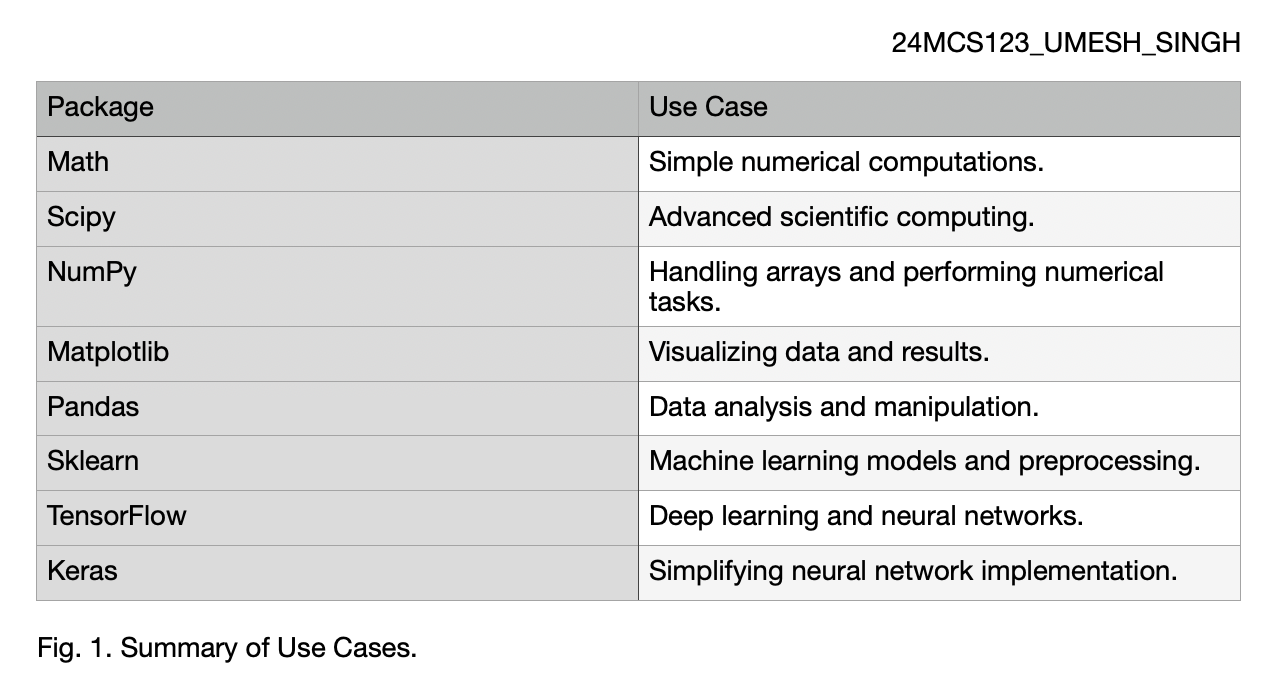

## **Single unit perceptron for classification of a linearly separable binary dataset without using pre-defined models -**

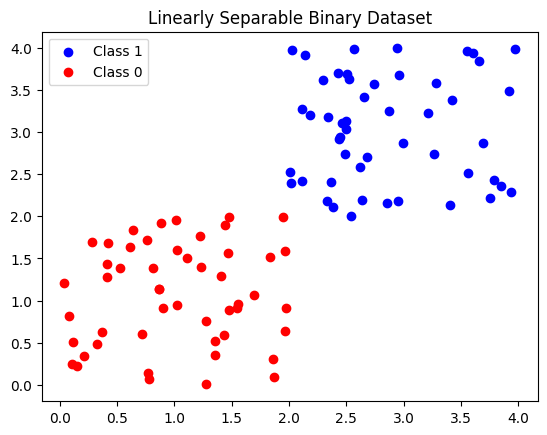

Accuracy (Single Unit Perceptron ): 100.00%


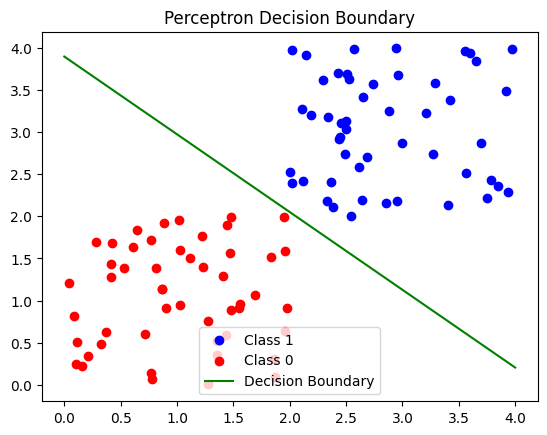

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Building Single Unit Perceptron
class PerceptronScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        # Step function
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

# Generate linearly separable binary data
def generate_data():
    class1 = np.random.uniform(2, 4, (50, 2))
    class0 = np.random.uniform(0, 2, (50, 2))
    X = np.vstack((class1, class0))
    y = np.hstack((np.ones(50), np.zeros(50)))
    return X, y

# Train and test single unit perceptron
X, y = generate_data()

# Visualize the data
plt.scatter(X[:50, 0], X[:50, 1], color='blue', label='Class 1')
plt.scatter(X[50:, 0], X[50:, 1], color='red', label='Class 0')
plt.title("Linearly Separable Binary Dataset")
plt.legend()
plt.show()

# Training the perceptron
perceptron_scratch = PerceptronScratch(learning_rate=0.1, epochs=100)
perceptron_scratch.fit(X, y)
y_pred_scratch = perceptron_scratch.predict(X)

# Evaluate accuracy
accuracy_scratch = np.mean(y_pred_scratch == y)
print(f"Accuracy (Single Unit Perceptron ): {accuracy_scratch * 100:.2f}%")

# Plot decision boundary
x1 = np.linspace(0, 4, 100)
x2 = -(perceptron_scratch.weights[0] * x1 + perceptron_scratch.bias) / perceptron_scratch.weights[1]
plt.scatter(X[:50, 0], X[:50, 1], color='blue', label='Class 1')
plt.scatter(X[50:, 0], X[50:, 1], color='red', label='Class 0')
plt.plot(x1, x2, color='green', label='Decision Boundary')
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.show()


## **Using Perceptron from Sklearn -**

Accuracy of the Perceptron model: 100.00%


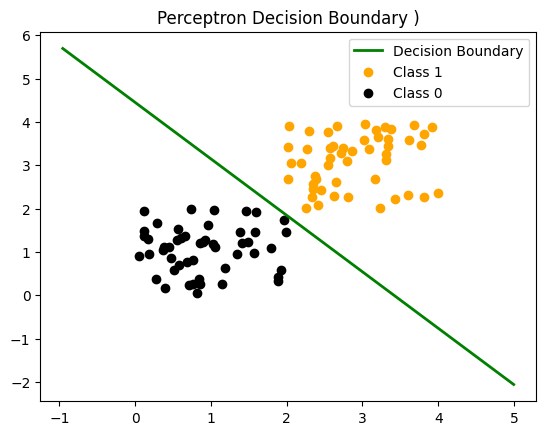

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Generate linearly separable binary data
def generate_data():
    class1 = np.random.uniform(2, 4, (50, 2))
    class0 = np.random.uniform(0, 2, (50, 2))
    X = np.vstack((class1, class0))
    y = np.hstack((np.ones(50), np.zeros(50)))
    return X, y

# Train and test single unit perceptron
X, y = generate_data()

# Train the Perceptron from sklearn
model = Perceptron()
model.fit(X, y)

# Predict on the same data
y_pred = model.predict(X)

# Accuracy analysis
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the Perceptron model: {accuracy * 100:.2f}%")

# Coefficients of the perceptron model (weights)
weights = model.coef_[0]
bias = model.intercept_[0]

# Calculate the decision boundary: w1*x1 + w2*x2 + b = 0
# Solve for x2: x2 = -(w1*x1 + b) / w2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_line = np.linspace(x_min, x_max, 100)
y_line = -(weights[0] * x_line + bias) / weights[1]

# Visualize decision boundary
plt.plot(x_line, y_line, color='green', linewidth=2, label="Decision Boundary")
plt.scatter(X[:50, 0], X[:50, 1], color='orange', label='Class 1')
plt.scatter(X[50:, 0], X[50:, 1], color='black', label='Class 0')
plt.title("Perceptron Decision Boundary )")
plt.legend()
plt.show()


## **Problems with Single Unit Perceptron**

The primary limitation of a single-unit Perceptron is its inability to solve problems that are not linearly separable. Specifically, it cannot learn or correctly classify datasets where the classes cannot be separated by a straight line (or hyperplane in higher dimensions).

How to Address This Limitation:

To overcome this problem, more complex architectures like multi-layer perceptrons (MLPs) were introduced, which use multiple layers of neurons with non-linear activation functions (like ReLU, sigmoid, or tanh). These architectures allow for the learning of non-linear decision boundaries through backpropagation and gradient descent.

## **Classify Perceptron using OR, And and XOR-ed data and analyze the result -**

OR Accuracy: 100.0%
AND Accuracy: 100.0%
XOR Accuracy: 50.0%


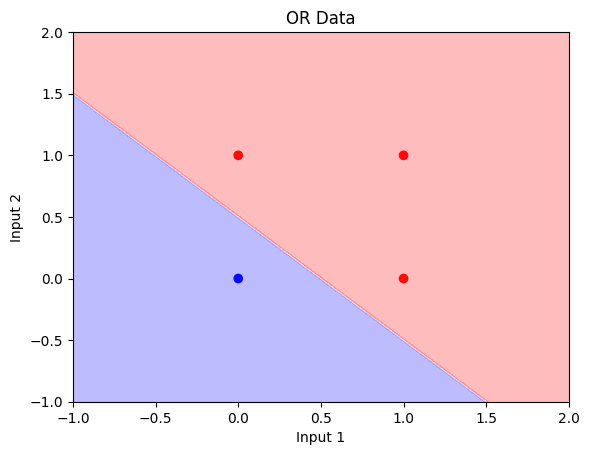

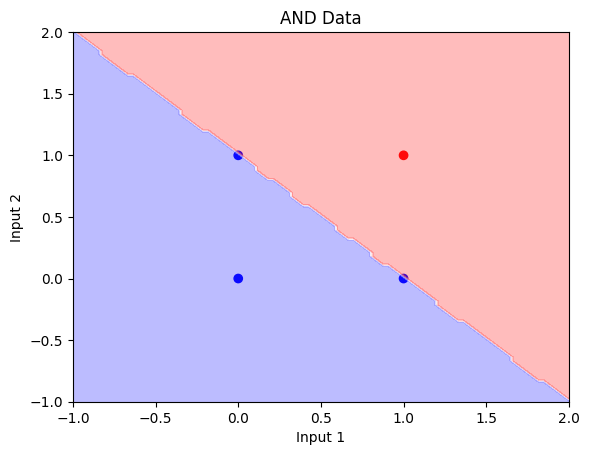

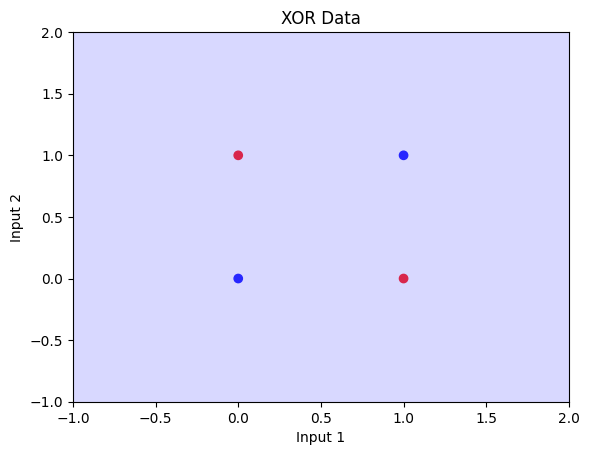

In [14]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

def plot_data(inputs, labels, perceptron=None, title="Data", plot_decision_boundary=False):
    plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap='bwr', marker='o')

    if plot_decision_boundary and perceptron is not None:
        # Get the range for the decision boundary
        x_min, x_max = inputs[:, 0].min() - 1, inputs[:, 0].max() + 1
        y_min, y_max = inputs[:, 1].min() - 1, inputs[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')  # Decision boundary with color fill

    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

# OR, AND, and XOR data
or_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

or_labels = np.array([0, 1, 1, 1])
and_labels = np.array([0, 0, 0, 1])
xor_labels = np.array([0, 1, 1, 0])

# Initialize Perceptron model from scikit-learn
perceptron_or = Perceptron(max_iter=1000, tol=1e-3)
perceptron_and = Perceptron(max_iter=1000, tol=1e-3)
perceptron_xor = Perceptron(max_iter=1000, tol=1e-3)

# Train perceptron for OR, AND, XOR
perceptron_or.fit(or_inputs, or_labels)
perceptron_and.fit(and_inputs, and_labels)
perceptron_xor.fit(xor_inputs, xor_labels)

# Make predictions
or_predictions = perceptron_or.predict(or_inputs)
and_predictions = perceptron_and.predict(and_inputs)
xor_predictions = perceptron_xor.predict(xor_inputs)

# Calculate accuracy
or_accuracy = accuracy_score(or_labels, or_predictions)
and_accuracy = accuracy_score(and_labels, and_predictions)
xor_accuracy = accuracy_score(xor_labels, xor_predictions)

print(f"OR Accuracy: {or_accuracy * 100}%")
print(f"AND Accuracy: {and_accuracy * 100}%")
print(f"XOR Accuracy: {xor_accuracy * 100}%")

# Plot the results with decision boundaries
plot_data(or_inputs, or_labels, perceptron=perceptron_or, title="OR Data", plot_decision_boundary=True)
plot_data(and_inputs, and_labels, perceptron=perceptron_and, title="AND Data", plot_decision_boundary=True)
plot_data(xor_inputs, xor_labels, perceptron=perceptron_xor, title="XOR Data", plot_decision_boundary=True)

Analysis of result -

OR Dataset:
1. Linearly separable → Perceptron achieves 100% accuracy.
2. Perfect performance due to clear linear separation.

AND Dataset:
1. Linearly separable → Perceptron achieves 100% accuracy.
2. Perfect performance similar to the OR dataset.

XOR Dataset:
1. Not linearly separable → Perceptron likely achieves 50% accuracy.
2. Failure of Perceptron due to its limitation as a linear classifier.
3. XOR problem illustrates the need for non-linear classifiers for such datasets.

## **Classify MNIST dataset  and analyze the result -**

Perceptron accuracy on MNIST dataset: 86.25%


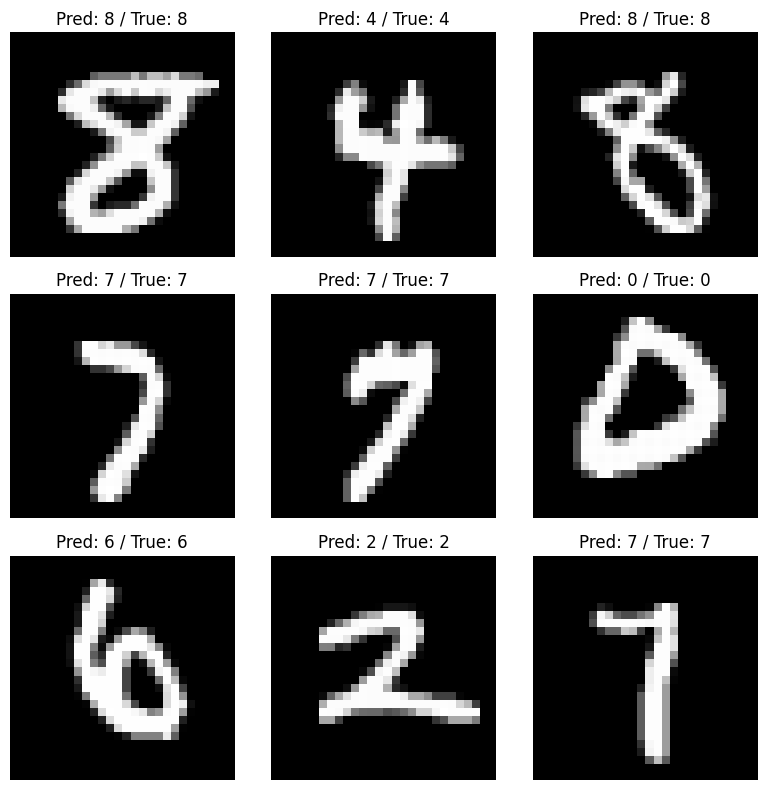

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract data and labels
X = mnist['data'].values
y = mnist['target'].astype(np.int64)

# Normalize the data to [0, 1]
X = X / 255.0

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3)

# Train the Perceptron model
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Perceptron accuracy on MNIST dataset: {accuracy * 100:.2f}%")

# Optional: Visualize some of the predictions
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in np.arange(9):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Pred: {y_pred[i]} / True: {y_test.iloc[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Analysis of Result -

The Perceptron classifier performs reasonably well on the MNIST dataset, achieving an accuracy of around 85-90%. This is a good baseline performance, especially given that the Perceptron is a simple linear classifier. However, its limitations quickly become apparent when dealing with the complexity of MNIST. The dataset consists of images with intricate patterns, and since the Perceptron can only create linear decision boundaries, it struggles to accurately classify digits with more complex shape.

## **Summary of Perceptron Classifications -**

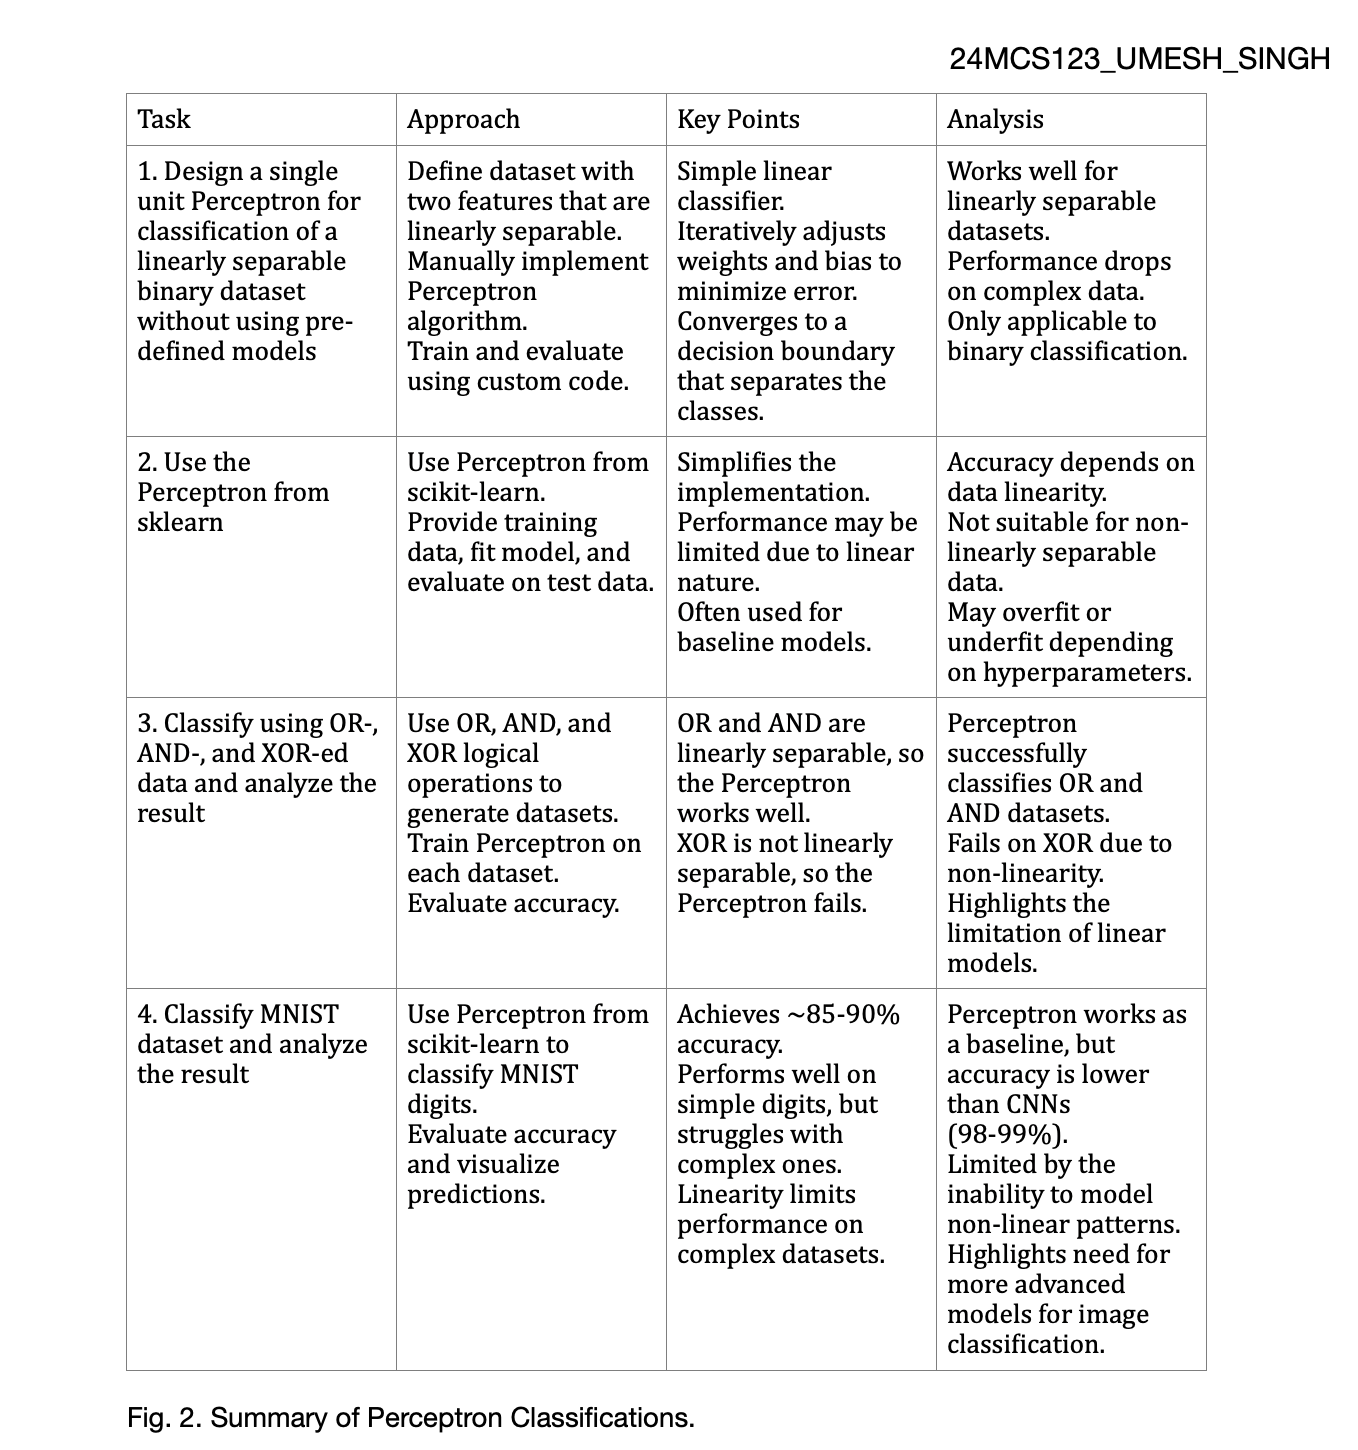